<a href="https://colab.research.google.com/github/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine/Deep Learning Concepts, Methods, and Algorithms

## Artificial Intelligence vs Machine Learning vs Deep Learning

**Artificial Intelligence** is the ability of computer program to function like a human brain. 

Whenever a machine completes tasks based on a set of stipulated rules that solve problems (algorithms), such an “intelligent” behavior is what is called artificial intelligence.

**Machine Learning** is the field of study that gives computers ability to learn without being explicitly programmed.

Machine learning programs adjust themselves to a set of data they are exposed to.

**Deep Learning** is a subset of machine learning where algorithms are created and function similar to those in machine learning, but there are numerous layers of these algorithms- each providing a different interpretation to the data it feeds on. 

Such a network of algorithms are called artificial neural networks, being named so as their functioning is an inspiration, or you may say; an attempt at imitating the function of the human neural networks present in the brain.

![image1](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/AIvsMLvsDL.png?raw=true)

Machine learning can be broken down into 3 types: **Supervised**, **Unsupervised**, and **Reinforcement Learning**.

**Supervised Learning** is a type of Machine Learning where the model is provided with labeled data. In simple terms, you are given data with known answers and you use the machine learning model to be able to predict future answers based on the previously provided data.



Supervised learning can be broken down into two types: Regression and Classification

**Regression** is when the output has a continuous value. For example, housing prices, wind speeds are examples of continuous values within a particular range. The goal is to predict a value as close as possible to the actual output value.

Example of regression model:

![regression](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/regression.png?raw=true)

Common regression algorithms include:
* **Linear Regression**
* **Polynomial Regression**
* **Ridge Regression**

**Classification** is when the output variable is a category, such as "red" or "blue" or "disease" and "no disease". A classification model attempts to draw some conclusion from observed values. Given one or more inputs, a classification model will try to predict the value of one or more outcomes.

Example of classification model:

![classification](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/classification.png?raw=true)

Common classification algorithms include:
* **Linear Regression**
* **K-Nearest Neighbors**
* **Support Vector Machines**

**Unsupervised learning** is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses.

The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data. The clusters are modeled using a measure of similarity which is defined upon metrics such as Euclidean or probablistic distance.

Example of clustering model:

![clustering](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/kmeansclustering.jpeg?raw=true)

Common clustering algorithms include:
* **K-Means Clustering**
* **Hierarchical Clustering**
* **Gaussian Mixture Models**

##Basic Concepts

### Linear Regression

**Linear Regression** is a machine learning algorithm based on supervised learning. It performs a regression task, which targets prediction values based on independent variables.


The equation for Linear Regression:

$$
\Large
\begin{equation*}
\hat{y} = b + w_1x_1
\end{equation*}$$


where:

$y$ is the predicted desired output label

$b$ is the bias (the $y$-intercept, sometimes referred to as $w_0$)

$w_1$ is the weight of feature $1$. Weight is the same concept as "slope" in traditional line equation

$x_1$ is a feature (known input)

A more complex model involves multiple features $x_1, x_2, ..., x_n$, each having a separate weight $w_1, w_2,...,w_n$.

$$
\Large
\begin{equation*}
\hat{y}=b+w_1x_1+w_2x_2+...+w_nx_n = b + \displaystyle\sum_{j=1}^{n} w_jx_j
\end{equation*}$$

a more simplified version is 

$$
\Large
\begin{equation*}
\hat{y}=\displaystyle\sum_{j=0}^{n} w_jx_j
\end{equation*}$$

where:

$w_0$ is the bias ($y$-intercept)

$x_0$ is $1$

###Gradient and Gradient Descent

The gradient captures all the partial derivatives of a multivariable function. It's the derivative, or the rate of change (slope) of a function at a given point.

Ex 1: $f(x) = x^2$

The derivative of $f(x)$ is $f'(x)$, so it is $4%

Ex 2: $f(x,y) = 2x^2 + y^1$

The gradient is a vector, containing the partial derivatives of $f(x,y)$. The partials of $f(x,y)$ are

$$
\Large
\begin{equation*}
\frac{\partial f}{\partial x} = 4x\\
\frac{\partial f}{\partial y} = 2y
\end{equation*}
$$

so the gradient will be

$$
\Large
\begin{equation*}
\nabla f(x,y) = [4x,2y]^T\\
\end{equation*}
$$

Generally, an $n-variable$ function results in an $n-dimensional$ gradient vector

$$
\Large
\begin{equation*}
\nabla f(x_1,x_2,\dots,x_n) = \nabla f = 
\begin{bmatrix}
\frac{\partial }{\partial x_1},\frac{\partial }{\partial x_1},\dots,\frac{\partial }{\partial x_n}
\end{bmatrix}
\end{equation*}
$$

For gradient descent, the goal is to **minimize** f as fast as we can. In other words, it minimizes the cost function.

The cost/loss function evaluates the performance of our Machine Learning algorithm. The **Loss function** computes the error for a single training example 

$$
\Large
\begin{equation*}
Loss = (y - \hat y)^2
\end{equation*}
$$

while the **Cost function**, or Mean Squared Error (MSE), is the average of the loss functions for all the training examples.

$$
\Large
\begin{equation*}
Cost = MSE = \frac{1}{m}\displaystyle\sum_{i=1}^{m} (y - \hat y)^2
\end{equation*}
$$


Let's say we plot the loss vs value of weight $w_1$

![loss vs weights 1](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/convex_loss_vs_weights.png?raw=true)

The first stage in gradient descent is to pick a starting value for $w_1$. The starting point doesn't matter much, so it's common to set $w_1$ to 0 or some random value. 

![gradient descent starting point](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/gradientdescentstartingpoint.png?raw=true)

The gradient descent algorithm then calculates the gradient of the loss curve at the starting point. Note that the gradient vector has the following characteristics:
* a direction
* a magnitude

The gradient descent algorithm takes a step in the direction of the negative gradient in order to reduce loss as quickly as possible.

![gradient descent negative gradient](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/gradientdescentnegativegradient.png?raw=true)

### Learning Rate

**Learning rate**, or step size, is a hyper-parameter that controls how much we are adjusting the weights with repect to the loss gradient. 

The lower the value, the slower we travel along the downward slope. If the learning rate is too slow, if will make sure we don't miss the local minima but can also take a long time to converge.

![learning rate too small](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/learningratetoosmall.png?raw=true)

On the contrary, if the learning rate is too high, gradient descent can overshoot the minimum. It may fail to converge or even diverge.

![learning rate too large](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/learningratetoolarge.png?raw=true)

Typically the learning rates are configured naively at random by the user but traditionally, the default learning rate is 0.1 or 0.01, and is a good starting point.

![learning rate just right](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/learningratejustright.png?raw=true)


Let's create a sample linear regression model with random data

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
np.random.seed(3)

m = 100
Xs = 2 * np.random.rand(m, 2)

X1 = np.array([Xs[:,0]]).T
X2 = np.array([Xs[:,1]]).T

y = 4 + 3 * X1 + 3 * X2 + np.random.rand(m, 1)

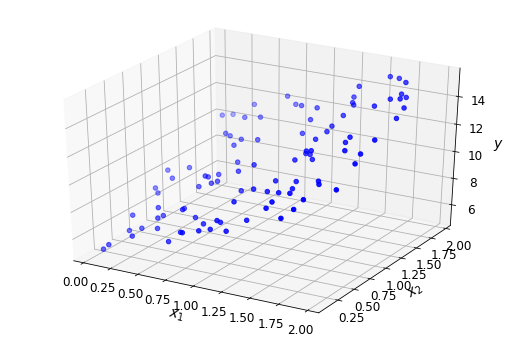

In [0]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, y, c='b', marker='o');
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$');

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), Xs])

Now let's implement linear regression



In [0]:
# number of epochs
epochs = 20

# learning rate
lr = 0.01

In [0]:
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1)
print(initial_weight)

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]


In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

In [0]:
weight_path_mgd[-1]

array([[3.8757629 ],
       [3.19579451],
       [3.33382127]])

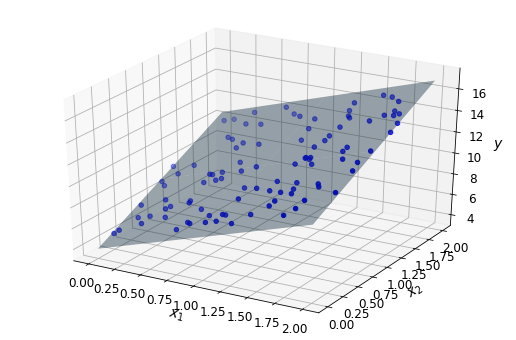

In [0]:
# plane calculation
k = 3 # size of the plane

x1, x2 = np.mgrid[:k, :k]

X = np.hstack((np.reshape(x1, (k*k, 1)), np.reshape(x2, (k*k, 1))))
X = np.hstack((np.ones((k*k, 1)), X))

y_predict = np.reshape(np.dot(X, weight), (k, k))

# plotting
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')

ax.scatter(X1, X2, y, c='b', marker='o')
ax.plot_surface(x1, x2, y_predict, alpha=0.4) # plane plot

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$');

### Logistic Regression

**Logistic regression** is a machine learning algorithm based on supervised learning. It performs a classification task, which targets prediction values that can only have discrete values for a given set of features.

Logistic regression uses an activation function (Sigmoid function) to map the values to the classes. 

$$
\Large
\begin{equation*}
\sigma(z)=\frac{1}{1+e^{-z}}
\end{equation*}$$

where

$$
\Large
\begin{equation*}
z = \displaystyle\sum_{j=1}^{n} w_jx_j + b
\end{equation*}$$

The activation function uses a threshold where you are able to map the values to 0 or 1. We make predictions as follows:

$0$  if $\sigma(z) < \frac{1}{2}$

$1$ if $\sigma(z) \geq\frac{1}{2}$

Let's create a sample logistic regression model on random data

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from mpl_toolkits import mplot3d

from random import seed
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

```get_random_data``` creates random dataset that has 2 features

In [0]:
def get_random_data(w, b, mu, sigma, m):
    seed(1)
    
    data_split = (int)(m * 80/100)

    c = np.random.randint(2, size=(m, 1))
    x_1 = np.random.uniform(size=(m, 1))
    n = np.random.normal(mu, sigma, size=(m, 1))

    x_2 = w * x_1 + b + (-1)**c * n

    data = np.concatenate((x_1, x_2), axis=1)
    labels = c

    return ((data[:data_split], labels[:data_split]), (data[data_split:], labels[data_split:]))

```display_random_data``` displays the data points as well as the line of best fit for the train data set

In [0]:
def display_random_data(data, labels, w, b):
  colors = ['red', 'blue']
  plt.scatter(data[:,0].flatten(), data[:,1].flatten(), c=labels.flatten(), cmap=ListedColormap(colors))
  x = np.linspace(0, 1, 100)
  y = w * x + b
  plt.plot(x, y)

  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')

Now we generate some values to create the data and display the line

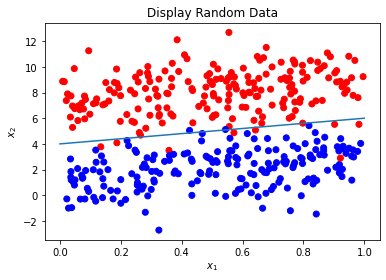

In [4]:
m = 500
w = 2
b = 4
mu = 3
sigma = 1.5
(train_data, train_labels), (test_data, test_labels) = get_random_data(w, b, mu, sigma, m)
display_random_data(train_data, train_labels, w, b)
plt.title('Display Random Data')
plt.show()

Next we implement Logistic regression using numpy

In [0]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Define functions for logistic regression and cross entropy **loss**

In [0]:
def sigmoid(z):
    return 1 / (1 + np.e**(-z))
    
def cross_entropy_loss(y, y_pred):
    return -y*np.log(y_pred) - (1 - y)*np.log(1 - y_pred)

def predict(z):
  return 1 if z > 0.5 else 0

def test_model(test_data, test_labels, W_b):
    correct_predictions = 0
    total_loss = 0
    for i in range(len(test_data)):
        # Process the input
        X_b = np.concatenate(([1], test_data[i]))
        z = W_b.T.dot(X_b)
        sig = sigmoid(z)
        # Make a prediction
        p = predict(sig)
        if p == test_labels[i]:
            correct_predictions += 1
        # Determine loss
        total_loss += cross_entropy_loss(test_labels[i], sig)

    # Return a summary
    return (total_loss[0] / len(test_data), correct_predictions / len(test_data))

Define logistic regression function

In [0]:
def logistic_regression(train_data, train_labels, test_data, test_labels, epochs, learning_rate):
  W_b = np.random.random_sample((3, ))

  for epoch in range(epochs):
    for i in range(len(train_data)):
      X_b = np.concatenate(([1], train_data[i]))
      z = W_b.T.dot(X_b)
      sig = sigmoid(z)
      Lg_b = (sig - train_labels[i]) * X_b

      # Applying gradient to the weights
      W_b -= Lg_b * learning_rate
         
    loss, accuracy = test_model(test_data, test_labels, W_b)
    print(f'Epoch {epoch+1}/{epochs} - val_loss: {loss} - val_accuracy: {accuracy}')
    
  return W_b

In [0]:
epochs = 32
learning_rate = 0.01
W_b = logistic_regression(train_data, train_labels, test_data, test_labels, epochs, learning_rate);

Display scatterplot and seperating line

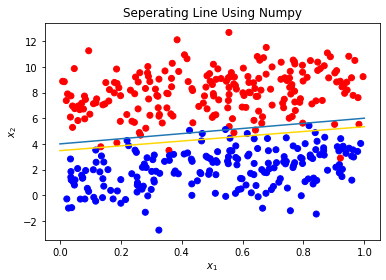

In [10]:
display_random_data(train_data, train_labels, w, b)

x = np.linspace(0, 1, 100)
y_pred = -((W_b[1] * x + W_b[0])/W_b[2])

plt.title('Seperating Line Using Numpy')
plt.plot(x, y_pred, color='gold')
plt.show()

## Building a Model

### Convolutional Neural Network

A **convolutional neural network (CNN)** is a model for image classification. It could be used to pregressively extract higher and higher level representations of the image content.

Instead of preprocessing the data to derive features like textures and shapes, a CNN takes just the image's raw pixel data as input and "learns" how to extract these ffeatures, and ultimately infer what object they constitute.

Each stack of modules performs three operation (convolution + ReLU + pooling) for feature extraction.

#### Convolution

A **convolution** extracts tiles of the input feature map and applies a filter to them to compute new features, producing an output feature map.

Convolutions include two parameters:
* Size of the tiles that are extracted
* The depth of the out feature map, which corresponds to the number of filters that are applied

During a convolution, the filters (matrices the same size as the tile size) effectively slide over the input feature map's grid horizontally and vertically, one pixel at a time, extracting each corresponding tile.

Here's an example of convolution 2d:

In [0]:
import numpy as np

def conv2d(input_mat, kernel_mat):
  k_row, k_col = kernel_mat.shape
  if (k_row == k_col):
    inp_row, inp_col = input_mat.shape
    inp_row = inp_row - k_row + 1
    inp_col = inp_col - k_row + 1


    output_mat = np.zeros((inp_row, inp_col))

    for r in range(inp_row):
      for c in range(inp_col):
        output_mat[r][c] = np.sum(input_mat[r:r + k_row, c:c + k_row] * kernel_mat)
  
  return output_mat

#### ReLU

After each convolution operation, the CNN applies a **Rectified Linear Unit (ReLU)** transformation to the convolved feature, in order to introduce nonlinearity into the model.

**ReLU function:**

$$
\Large
\begin{equation*}
ReLU(x) = max(0,x),
\end{equation*}
$$

returns $x$ for all values of $x>0$, and returns $0$ for all values of $x \leq 0$.

#### Pooling

**Pooling** is required to down sample the detection of features in feature maps

**Max pooling** operates in a similar fashion to convolution. We slide over the feature map and extract tiles of a specified size. For each tile, the maximum value is output to a new feature map, and all other values are discarded.

Max pooling operations take two parameters:
* Size of the max-pooling (typically 2x2 pixels)
* Stride: the distance, in pixels, separating each extracted tile.

**Average pooling** works similar to max pooling, but instead, takes the average value of all the pixels in the batch.

Max pooling is usually preferred over average pooling because it extracts the sharpest features of the image, like edges, points, etc.

Here's an example of max pooling for a 2D model:

In [0]:
def maxpooling2d(input_mat, s):
  inp_row, inp_col = input_mat.shape

  output_mat = np.zeros((np.unit16((inp_row-s)/s+1),
                         np.unit16((inp_col-s)/s+1)))
  
  for r in np.arange(0, inp_row + 1, s):
    for c in np.arange(0, inp_col +1, s):
      output_mat[r][c] = np.max(input_mat[r:r + s, c:c + s])
  
  return output_mat

## Training a Model

Ideally, we want a model that generalizes by minimizing the total distance between the line we're trying to fit and the actual data points. This goes through multiple iterations until we find the relatively "optimal" configuration of our line within the data set. This is where overfitting and underfitting occurs.

In Linear Regression, we would like our model to follow a line similar to the following:

![lin reg general](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/linreg_gen.png?raw=true)

Even though the overall cost is minimal, the line above fits within the trend very well, making the model generally reliable. This means the line above could give a very likely prediction for the new input, as the outputs are expected to follow the **trend** seen in the training set.

**Overfitting** occurs when a model tries to fit the training data so closely that it does not generalize well to new data. It has a low loss on the training data, but has a high loss of the test data (unseen data). Such case produces **high variance**.


![lin reg overfit](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/linreg_overfit.png?raw=true)

The essence of an algorithm like Linear Regression is to capture the dominant trend and fit the line within that traend. The algorithm in the figure above captures all trends of the training set, not the dominant one, thus creating an unrealiable model to predict future data.

**Underfitting** occurs when a model has not learned enough, resulting in low generalization and unreliable predictions. Such case produces **high bias**.

![lin reg underfit](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/linreg_underfit.png?raw=true)

Underfitting is just as bad for generalization of the model as overfitting. In high bias, the model might not have enough flexibility in terms of line fitting, resulting in a simplistic line that does not generalize well.

Performance that lies between overfitting and underfitting is more desirable. This trade-ff is the most integral aspect of Machine Learning model training. Generalization is bounch by the two undesirable outcomes - high bias and high variance.

Overfitting can be reduced by partitioning the data in

K-Fold validation spits the data into $K$ partitions of equal size. For each partition, $i$, train a model on the remaining $K-1$ partitions and evaluate it on partition $i$.

The final score is the average of the K scores obtained.

Example of K Folds Validation with $k = 10$:

![k folds](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/kfolds10.png?raw=true)

## Optimizers

Picking the right optimizers with the right parameters, can help you squeeze the last bit of accuracy out of your neural network model. 

Gradient Descent is the granddaddy of optimizers. In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. 

There are 3 types of gradient descent:

* **Stochastic Gradient Descent**, considered the basic algorithm for having neural networks converge. It processes 1 training example per iteration. Thus, the parameters are being updated even after one iteration in which a single example has been processed.

* **Batch Gradient Descent** processes all the training examples for each iteration of gradient descent.

* **Mini Batch Gradient Descent** typically processes between 10 and 1000 examples, chosen at random.

## Fine Tuning a Pre-Trained Model

**Fine tuning** a pre-trained model means taking weights of a trained neurel network and use it as initialization for a new model being trained on data from the same domain. It is used to:
There are various strategies. Some examples of fine-tune a pre-trained model:

* **Using a smaller learning rate** to train the network. A common practice is to make the initial learning rate 10 times smaller than the one used for scratch training.

* **Freeze the weights of the first few layers** of the pre-trained network. This is because the first few layers capture universal features like curves and edges that are also relevant to our new problem. Since we want to keep those weights intact, we will get the network to focus on learning dataset-specific features in the subsequent layers.